In [6]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
df = pd.read_csv(r'D:\Z Ph.D Manuscript\spatiotemporalData.csv',
                 parse_dates=['Date'],
                 index_col=['Date'])


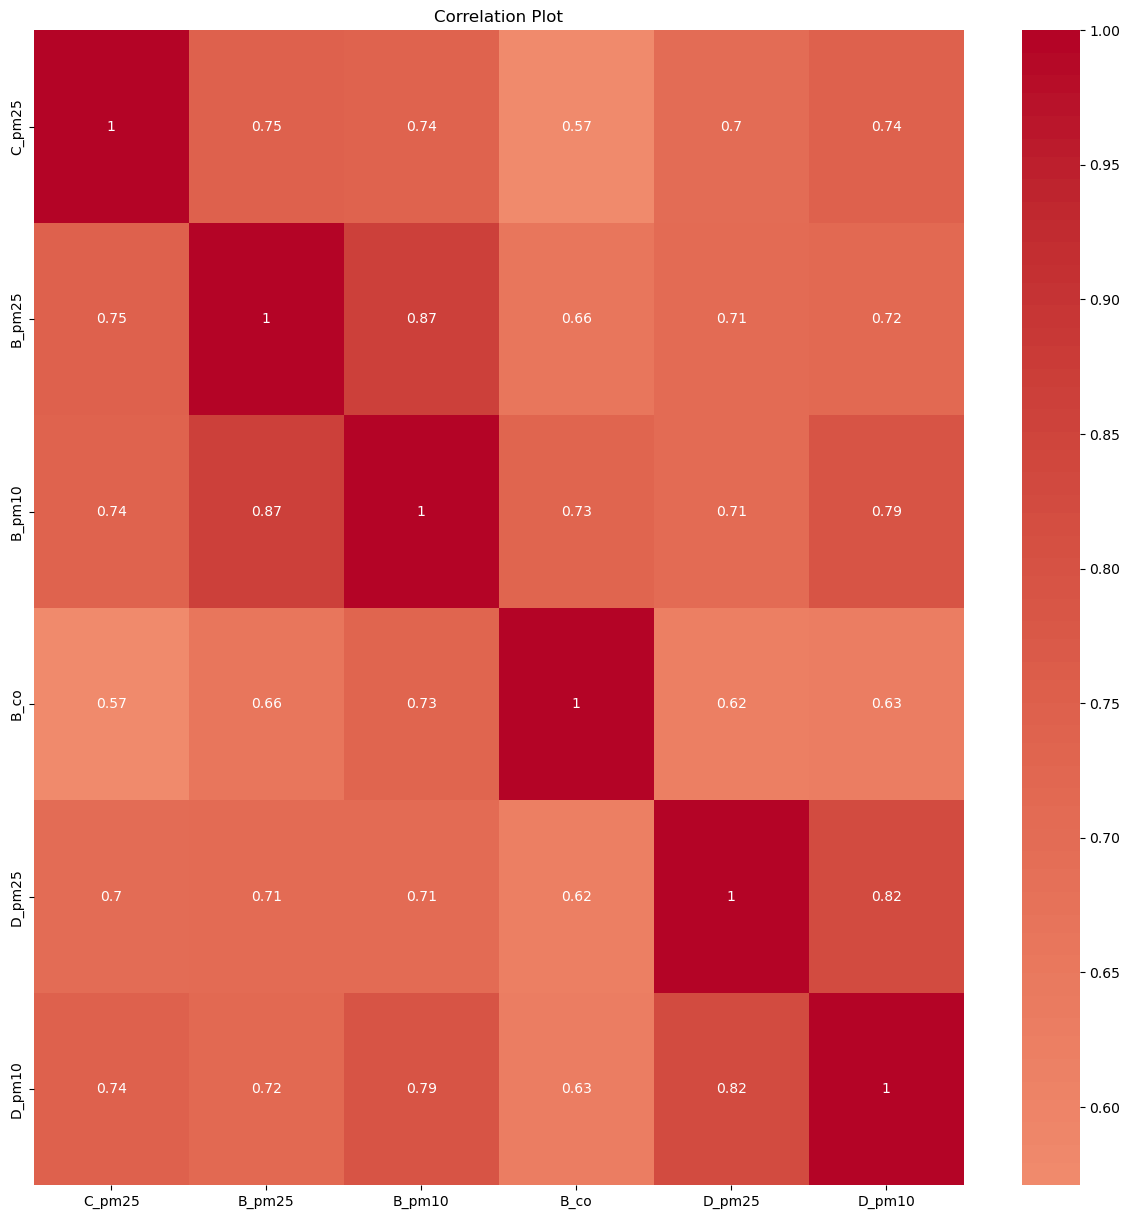

,C_pm25,B_pm25,B_pm10,B_co,D_pm25,D_pm10
Date,,,,,,
2021-03-12 00:00:00,269.67,203.59,322.91,1.14,106.69,412.00
2021-03-12 01:00:00,239.00,203.46,273.08,1.03,106.69,414.75
2021-03-12 02:00:00,214.33,204.77,236.94,1.05,106.69,402.50
2021-03-12 03:00:00,197.00,197.63,209.35,1.12,106.69,373.00
2021-03-12 04:00:00,216.67,201.15,223.85,1.11,106.69,319.00
...,...,...,...,...,...,...
2023-01-24 10:00:00,213.00,285.00,301.73,1.15,178.75,356.75
2023-01-24 11:00:00,224.00,271.52,301.27,1.00,181.25,362.25
2023-01-24 12:00:00,221.75,252.47,295.88,0.91,159.00,317.00


In [7]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Plot')
plt.show()

dataset = df.copy()
dataset


features: (10023, 6)
targets: (10023, 1)
X_train: (7241, 6)
X_test: (1504, 6)
X_val: (1278, 6)
y_train: (7241, 1)
y_test: (1504, 1)
y_val: (1278, 1)
Epoch 1/200
804/804 [==============================] - 7s 6ms/step - loss: 0.7279 - val_loss: 1.2478 - lr: 0.0100
Epoch 2/200
804/804 [==============================] - 4s 5ms/step - loss: 2.6927 - val_loss: 17.7180 - lr: 0.0100
Epoch 3/200
804/804 [==============================] - 4s 4ms/step - loss: 1.3615 - val_loss: 1.1313 - lr: 0.0100
Epoch 4/200
804/804 [==============================] - 4s 4ms/step - loss: 0.4069 - val_loss: 1.1280 - lr: 0.0100
Epoch 5/200
804/804 [==============================] - 4s 4ms/step - loss: 0.3744 - val_loss: 0.9897 - lr: 0.0100
Epoch 6/200
804/804 [==============================] - 4s 5ms/step - loss: 0.3120 - val_loss: 0.3146 - lr: 0.0100
Epoch 7/200
804/804 [==============================] - 4s 5ms/step - loss: 0.1851 - val_loss: 0.1084 - lr: 0.0100
Epoch 8/200
804/804 [==============================]

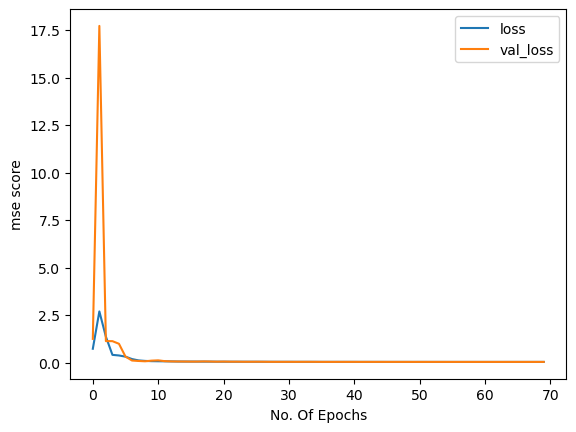

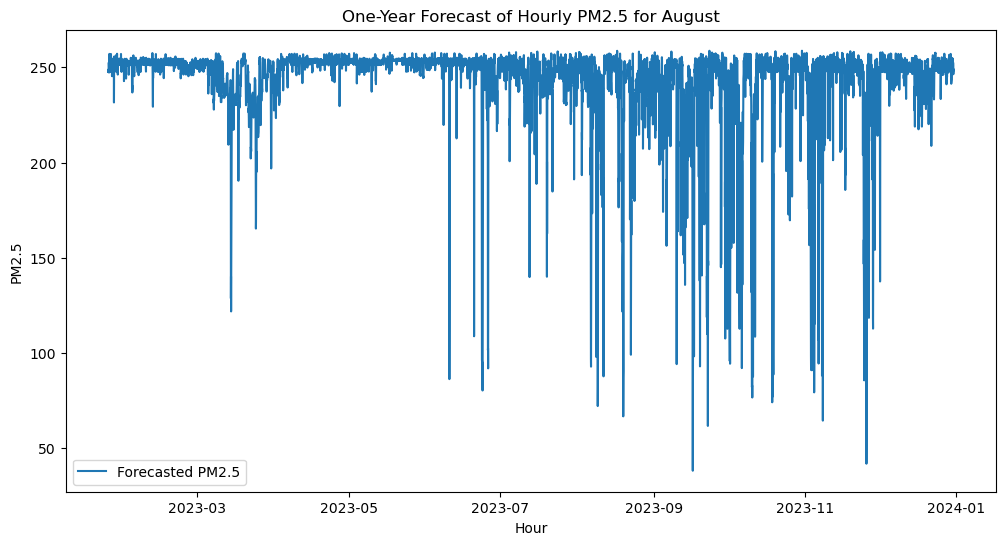

166/166 [==============================] - 0s 1ms/step
-----C_pm25-----
features: (10023, 6)
targets: (10023, 1)
X_train: (7241, 6)
X_test: (1504, 6)
X_val: (1278, 6)
y_train: (7241, 1)
y_test: (1504, 1)
y_val: (1278, 1)


C:\Users\91783\AppData\Local\Temp\ipykernel_11384\178933712.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[[df.iloc[:,a:a+1].columns[0]+"_pred"]]=predictions


Epoch 1/200
804/804 [==============================] - 7s 5ms/step - loss: 0.6334 - val_loss: 1.2090 - lr: 0.0100
Epoch 2/200
804/804 [==============================] - 4s 5ms/step - loss: 0.2939 - val_loss: 0.7461 - lr: 0.0100
Epoch 3/200
804/804 [==============================] - 3s 4ms/step - loss: 0.1547 - val_loss: 0.2247 - lr: 0.0100
Epoch 4/200
804/804 [==============================] - 3s 4ms/step - loss: 0.0836 - val_loss: 0.1321 - lr: 0.0100
Epoch 5/200
804/804 [==============================] - 3s 4ms/step - loss: 0.0623 - val_loss: 0.1266 - lr: 0.0100
Epoch 6/200
804/804 [==============================] - 3s 4ms/step - loss: 0.0514 - val_loss: 0.1323 - lr: 0.0100
Epoch 7/200
804/804 [==============================] - 4s 5ms/step - loss: 0.0486 - val_loss: 0.1444 - lr: 0.0100
Epoch 8/200
804/804 [==============================] - 4s 4ms/step - loss: 0.0447 - val_loss: 0.1159 - lr: 0.0100
Epoch 9/200
804/804 [==============================] - 4s 4ms/step - loss: 0.0446 - val_

In [ ]:
for a in range(len(df.columns)):
    b=df.iloc[:,a:a+1]
    features=df.values   # df.values  b.values for sigle 
    targets=b.values

    X_train, X_test, y_train, y_test  = train_test_split(features, targets, test_size=0.15, random_state=1, shuffle=False)

    X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.15, random_state=1, shuffle=False)

    print("features:", features.shape)
    print("targets:", targets.shape)

    print("X_train:", X_train.shape)
    print("X_test:", X_test.shape)
    print("X_val:", X_val.shape)

    print("y_train:", y_train.shape)
    print("y_test:", y_test.shape)
    print("y_val:", y_val.shape)


    

    scaler = MinMaxScaler()
    scaler.fit(X_train)

    X_train = scaler.transform(X_train)

    X_val = scaler.transform(X_val)

    X_test = scaler.transform(X_test)

    X_train.shape, X_test.shape


    win_length=10
    batch_size=9
    num_features=features.shape[1]

    train_generator = TimeseriesGenerator(X_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
    val_generator = TimeseriesGenerator(X_val, y_val, length=win_length, sampling_rate=1, batch_size=batch_size)
    test_generator = TimeseriesGenerator(X_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

    model_CNNLSTM = tf.keras.Sequential([ 
    tf.keras.layers.Conv1D(filters=90, kernel_size=3,activation="LeakyReLU" , input_shape=(win_length,num_features)),
    #tf.keras.layers.MaxPool1D(pool_size=2),
    #tf.keras.layers.RepeatVector(win_length),
    tf.keras.layers.LSTM(80,   return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(targets.shape[1])
    ])

    model_CNNLSTM.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.01),loss=tf.losses.MeanSquaredLogarithmicError())

    tf.keras.utils.plot_model(model=model_CNNLSTM, show_shapes=True)
    
    
    

    lr_monitor = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=3, factor=0.5, cooldown=1)
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

    with tf.device('/GPU:0'):
        prepared_model_CNNLSTM = model_CNNLSTM.fit(train_generator, 
                                           validation_data=val_generator,
                                           epochs=200, 
                                           shuffle=False,  
                                           callbacks=[lr_monitor, early_stopping])
        
    plt.plot(prepared_model_CNNLSTM.history["loss"],label="loss")
    plt.plot(prepared_model_CNNLSTM.history["val_loss"],label="val_loss")
    plt.legend(loc="best")
    plt.xlabel("No. Of Epochs")
    plt.ylabel("mse score")
    
    
    # Create a DataFrame for August with hourly timestamps
    august_dates = pd.date_range(start='2023-01-24', end='2023-12-31', freq='H')
    df_august = pd.DataFrame(index=august_dates)

    # Forecast PM2.5 and Temp values for August using the model
    august_generator = TimeseriesGenerator(features, np.zeros(len(features)), length=win_length, sampling_rate=1, batch_size=1)
    predicted_values_august = model_CNNLSTM.predict(august_generator)
    #predicted_values_august = (predicted_values_august * pm25_std) + pm25_mean

    # Ensure the length of forecasted values matches the length of the DataFrame index for August
    df_august['PM2.5'] = predicted_values_august[:len(df_august)]

    f=df_august['PM2.5']

    
        # downloading csv file
    cities = pd.DataFrame(f)
    cities.to_csv('D:/Z Ph.D Manuscript/Results/FORE/train_CNNLSTM_'+df.iloc[:,a:a+1].columns[0]+'_S_fore.csv')


    # Plot the forecasted PM2.5 values for August
    plt.figure(figsize=(12, 6))
    plt.plot(df_august.index, df_august['PM2.5'], label='Forecasted PM2.5')
    plt.xlabel('Hour')
    plt.ylabel('PM2.5')
    plt.legend()
    plt.title('One-Year Forecast of Hourly PM2.5 for August')
    plt.show()

    
    
    
    # downloading csv file
    cities = pd.DataFrame(prepared_model_CNNLSTM.history["loss"])
    cities.to_csv('D:/Z Ph.D Manuscript/Results/LOSS/train_CNNLSTM_'+df.iloc[:,a:a+1].columns[0]+'_S_loss.csv')

    # downloading csv file
    cities = pd.DataFrame(prepared_model_CNNLSTM.history["val_loss"])
    cities.to_csv('D:/Z Ph.D Manuscript/Results/LOSS/val_CNNLSTM_'+df.iloc[:,a:a+1].columns[0]+'_S_loss.csv')

    model_CNNLSTM.evaluate(train_generator, verbose=1)
    predictions=model_CNNLSTM.predict(train_generator)

    pd.DataFrame(predictions)

    # downloading csv file
    cities = pd.DataFrame(predictions)
    cities.to_csv('D:/Z Ph.D Manuscript/Results/PRED/train_CNNLSTM_'+df.iloc[:,a:a+1].columns[0]+'_S_pred.csv')

    model_CNNLSTM.evaluate(test_generator, verbose=1)

    predictions=model_CNNLSTM.predict(test_generator)

    pd.DataFrame(predictions)

    # downloading csv file
    cities = pd.DataFrame(predictions)
    cities.to_csv('D:/Z Ph.D Manuscript/Results/PRED/test_CNNLSTM_'+df.iloc[:,a:a+1].columns[0]+'_S_pred.csv')

    df_pred=pd.DataFrame(X_test[:,:][win_length:])

    rev_trans=scaler.inverse_transform(df_pred)

    df_final=dataset[rev_trans.shape[0]*-1:]

    df_final[[df.iloc[:,a:a+1].columns[0]+"_pred"]]=predictions

    df_final


    df_final[[df.iloc[:,a:a+1].columns[0],df.iloc[:,a:a+1].columns[0]+"_pred"]].plot(figsize=(20,10))

    def evaluate_preds(y_true, y_pred):
        y_true = tf.cast(y_true, dtype=tf.float32)
        y_pred = tf.cast(y_pred, dtype=tf.float32)

        # Calculate various metrics
        mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
        mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
        rmse = tf.sqrt(mse)
        mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
        mslr = tf.keras.metrics.mean_squared_logarithmic_error(y_true, y_pred)

        return {"mae": mae.numpy(),
                "mse": mse.numpy(),
                "rmse": rmse.numpy(),
                "mape": mape.numpy(),
                "mslr": mslr.numpy(),
               }


    selected_features = [df.iloc[:,a:a+1].columns[0]]

    for feature in selected_features:
        print("-----{}-----".format(feature))
#         evala=evaluate_preds(y_true=df_final[feature].values,
#                              y_pred=df_final["{}_pred".format(feature)].values)
#         print(evala)
#         eval=pd.DataFrame.from_dict(evala,index=[0] )
#         eval.to_csv(df.iloc[:,a:a+1].columns[0]+"_evaluation.csv")
        eval_results = evaluate_preds(y_true=df_final[feature].values, y_pred=df_final["{}_pred".format(feature)].values)
        eval_df = pd.DataFrame.from_dict(eval_results, orient='index', columns=['value'])
        eval_df.to_csv('D:\Z Ph.D Manuscript\Results\EVAL\{}_CNNLSTM_evaluation_S.csv'.format(df.iloc[:, a:a+1].columns[0]))
